In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time;  from datetime import datetime
import math
plt.rcParams["figure.figsize"] = (15,10)

In [105]:
desklet = pd.read_csv('desklet_bid_adjustments.csv') # read the desklet
summary = desklet.tail(2) # store summary rows separately
desklet = desklet.drop([327,328]) # drop summary columns rows
orig_desklet=desklet

In [106]:
desklet.rename(columns={'Avg. CPC':'avg_cpc($)'}, inplace=True)
desklet.rename(columns={'Cost / conv.':'cost_per_conv($)'}, inplace=True)
desklet.rename(columns={'Conv. rate':'conversion_rate(%)'}, inplace=True)
desklet.rename(columns={'Avg. CPC':'avg_cpc($)'}, inplace=True)
desklet.rename(columns={'Cost':'Cost($)'}, inplace=True)
desklet.rename(columns={'CTR':'CTR(%)'}, inplace=True)
desklet.rename(columns={'Conv. value':'Conv. value($)'}, inplace=True)
desklet.rename(columns={'Bid adj.':"Bid adj.(%)"}, inplace=True)

In [107]:
### CONVERT DATA INTO FLOATS FOR GRAPHING


# convert dollar amounts into floats for processing

def convert_dollar_float(row):
    try:
        return float(str(row)[1:])
    except:
        return float(str(row)[1:].replace(',', ''))
    
desklet['Cost($)'] = desklet['Cost($)'].apply(convert_dollar_float)
desklet['avg_cpc($)'] = desklet['avg_cpc($)'].apply(convert_dollar_float)
desklet['cost_per_conv($)'] = desklet['cost_per_conv($)'].apply(convert_dollar_float)

# convert percentages into floats for processing

def convert_percentage_float(row):
    return float(str(row)[:-1])
    
desklet['conversion_rate(%)'] = desklet['conversion_rate(%)'].apply(convert_percentage_float)    
desklet['CTR(%)'] = desklet['CTR(%)'].apply(convert_percentage_float)    
desklet['Bid adj.(%)']=desklet['Bid adj.(%)'].apply(convert_percentage_float)

# convert strings with commas into floats

def change_comma_values_to_float(row):
    row = str(row).replace(',', '')
    return float(row)
    
desklet.Conversions=desklet.Conversions.apply(change_comma_values_to_float)
desklet['Conv. value($)']=desklet['Conv. value($)'].apply(change_comma_values_to_float)

# convert bid adjustment to float
def strip_first_last(row):
    try:
        row  = (str(row)[1:-1])
        return float(row)
    except:
        return 0



In [108]:
desklet.head()

,Location,Bid adj.(%),Clicks,Impr.,CTR(%),avg_cpc($),Cost($),Avg. pos.,Conversions,cost_per_conv($),conversion_rate(%),Conv. value($),Conv. value / cost
0,"Milwaukee, Wisconsin, United States",60.0,482,"9,312",5.18,0.67,324.67,2.5,21.0,15.46,4.36,1900.95,5.86
1,"Plant City, Florida, United States",30.0,57,632,9.02,0.69,39.38,2.7,5.0,7.88,8.77,491.92,12.49
2,"North Carolina, United States",0.0,"6,205","102,295",6.07,0.50,3076.82,2.8,131.0,23.49,2.11,11291.79,3.67
3,"92128, California, United States",200.0,62,"1,000",6.20,1.15,71.39,1.8,1.0,71.39,1.61,109.16,1.53
4,"38103, Tennessee, United States",-50.0,4,145,2.76,0.15,0.61,3.3,0.0,0.00,0.00,0.00,0.00


In [119]:
### Extract State and city/zip data from Location

# Extract state from location data
def state_from_location(row):
    try:
        row = str(row).split(',')
        return row[-2].strip()
    except:
        return np.nan
desklet['state'] = desklet.Location.apply(state_from_location)

# Extract city or zip from location data
def cityzip_from_location(row):
    try:
        row = str(row).split(',')
        return row[-3].strip()
    except:
        return np.nan
desklet['cityzip'] = desklet.Location.apply(cityzip_from_location)


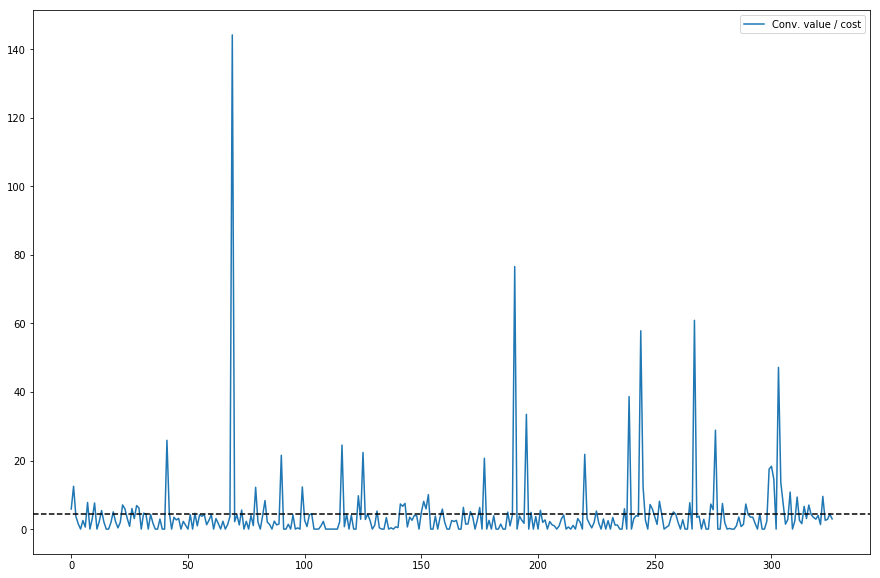

In [121]:
# This is the average revenue in $ per dollar spent on advertising.
# We should try to even out this graph, with ideally everything ~= 1 (thats for marginal though. Hmmmm)
# So press down the bumps with increases in spending, and pull up the troughs by reducing spending.

desklet[["Conv. value / cost"]].plot().\
axhline(y=desklet["Conv. value / cost"].describe().iloc[1], color='black', linestyle='--')

In [ ]:
# TODO

# Find a list of places where this graph is spiking, and graph against number of coversions
# We should try to figure out how many are unique conversions/ as opposed to a returning customers.


In [123]:
# TODO - See if there is a mismatch between adjustment and cost/conv. if there is a positive BA
# but low conversions OR high cost/conversion(?) we should revise downwards

In [124]:
# TODO - Separate state level bids and compare them to agregated bids by city per state. If there is a mismatch,
# Lets say we have a BA of +50% in the state but in the cities and zips we have -50, that doesn't make sense.

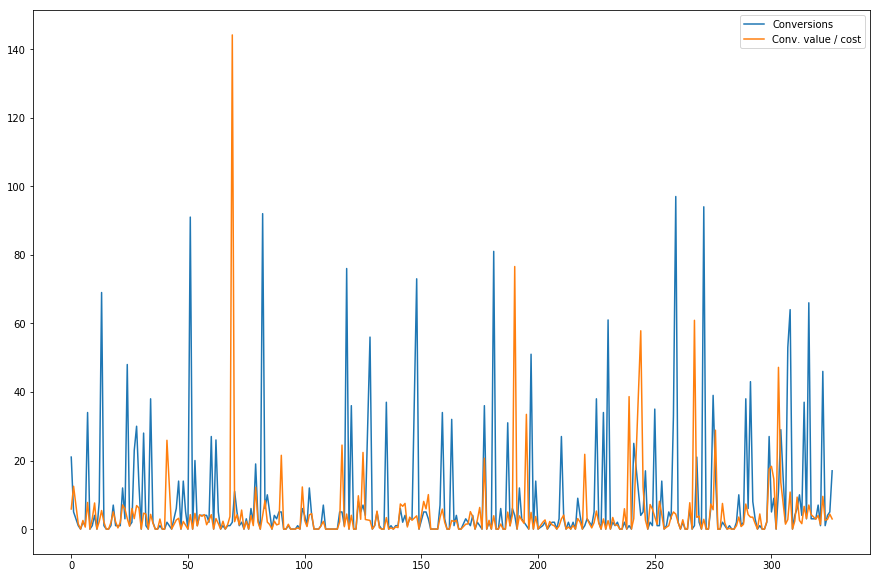

In [114]:
df2 = desklet[desklet['Conversions']<100]
df2[["Conversions","Conv. value / cost"]].plot()

In [115]:
# Sort this by column1
desklet["Conv. value / cost"].value_counts().head()

0.00    96
0.94     4
0.35     3
2.57     3
4.39     3
Name: Conv. value / cost, dtype: int64

In [116]:
# There are a number of records where no conversions happen, and some of them cost a lot of money
# We could turn down the BA on these.
# Is there anything we need to check against for this? 
# The conversion rate here is 0
# Total cost for these ads - once the cost is an int.

cost_where_no_conversion= 0


In [117]:
desklet["Conv. value / cost"].describe().iloc[1]

4.4492966360856272